#### **Predicting Gold Price Variations Using Machine Learning Techniques**

##### Dataset Download

**[Download Link](https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data)**

In [242]:
import kaggle as k

k.api.authenticate()

k.api.dataset_download_files("altruistdelhite04/gold-price-data", path = ".", unzip = True)

print("Dataset Downloaded")

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
Dataset Downloaded


In [243]:
# Directory for storing plots
import os
os.makedirs("./plots", exist_ok=True)

#### **Libraries**

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [245]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('./gld_price_data.csv')

**Info about Dataset**

In [246]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [247]:
print(f"Shape of the dataset is {gold_data.shape}")

Shape of the dataset is (2290, 6)


In [248]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [249]:
gold_data.duplicated().sum()

np.int64(0)

In [250]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [251]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [252]:
# Convert 'Date' column to datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

#### Visualization

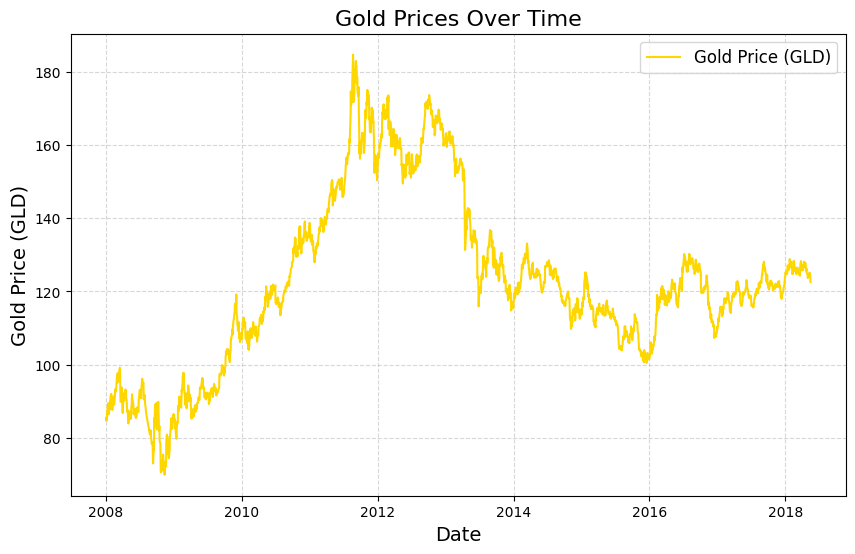

In [253]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(gold_data['Date'], gold_data['GLD'], color='gold', label='Gold Price (GLD)')
plt.title('Gold Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gold Price (GLD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.savefig("./plots/gold_price_over_time.png")
plt.show()

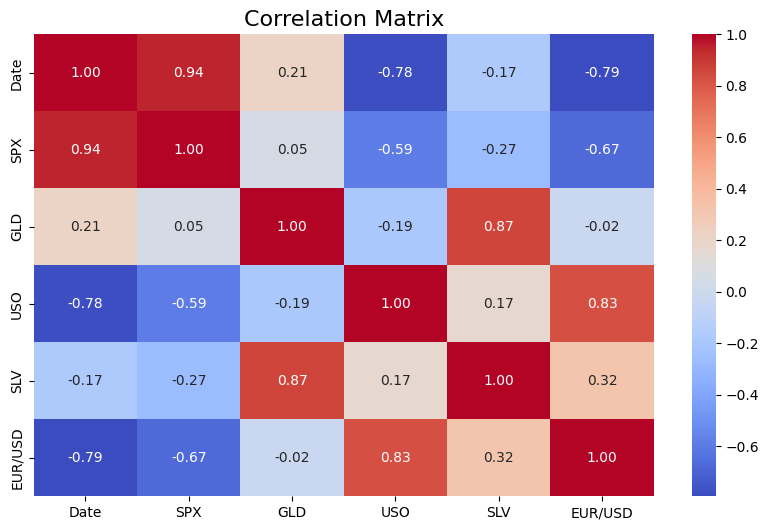

In [254]:
plt.figure(figsize=(10, 6))
correlation_matrix = gold_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.savefig("./plots/heatmap.png")
plt.show()

<Figure size 1000x600 with 0 Axes>

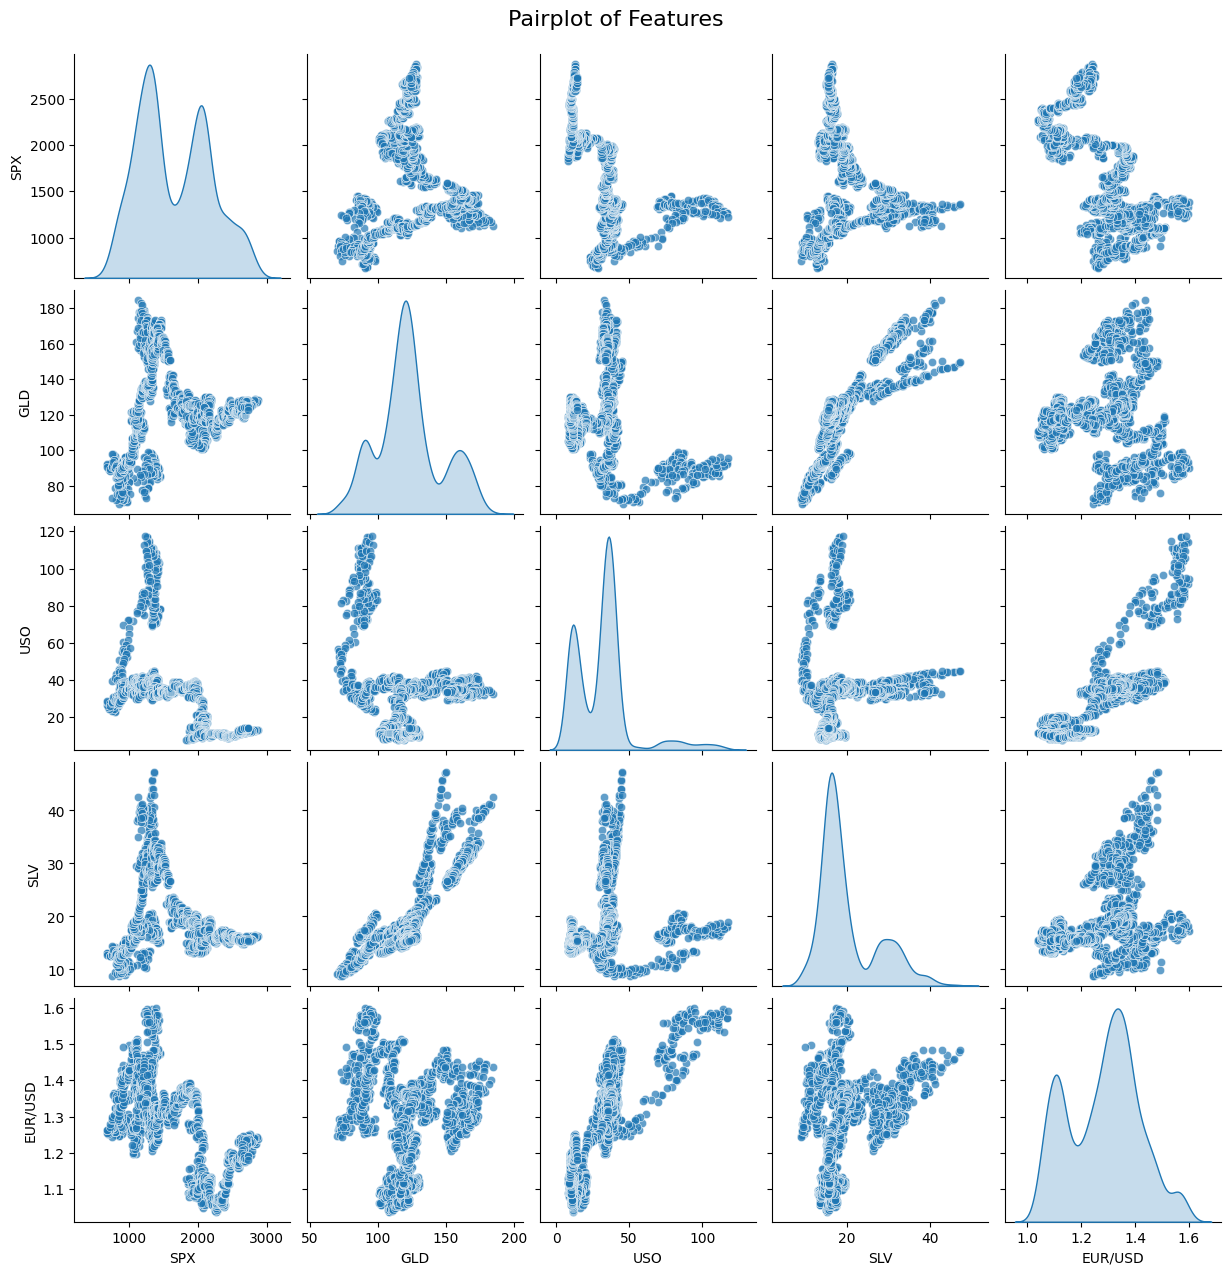

In [255]:
plt.figure(figsize=(10, 6))
sns.pairplot(gold_data, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Features', y=1.02, fontsize=16)
plt.savefig("./plots/pairplot.png")
plt.show()

In [256]:
gold_data['Rolling_Mean'] = gold_data['GLD'].rolling(window=30).mean()

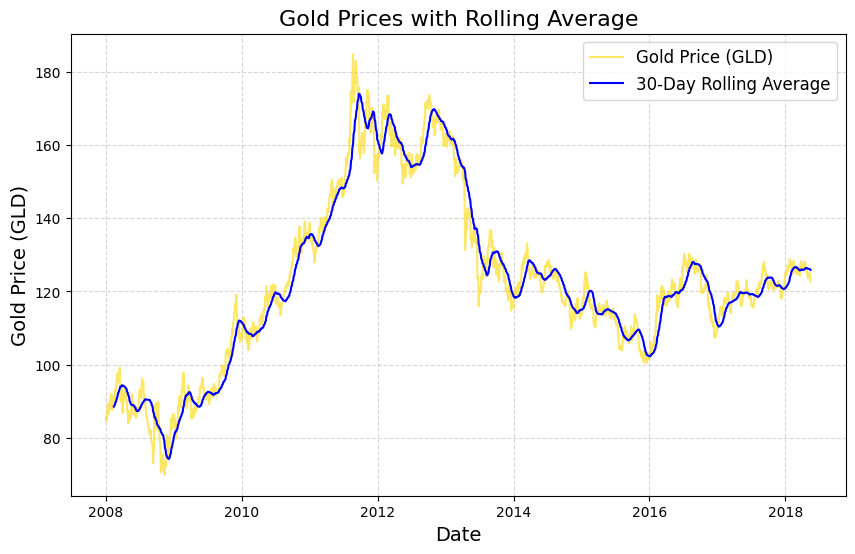

In [257]:
plt.figure(figsize=(10, 6))
plt.plot(gold_data['Date'], gold_data['GLD'], label='Gold Price (GLD)', color='gold', alpha=0.6)
plt.plot(gold_data['Date'], gold_data['Rolling_Mean'], label='30-Day Rolling Average', color='blue')
plt.title('Gold Prices with Rolling Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gold Price (GLD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.savefig("./plots/rolling_avg.png")
plt.show()

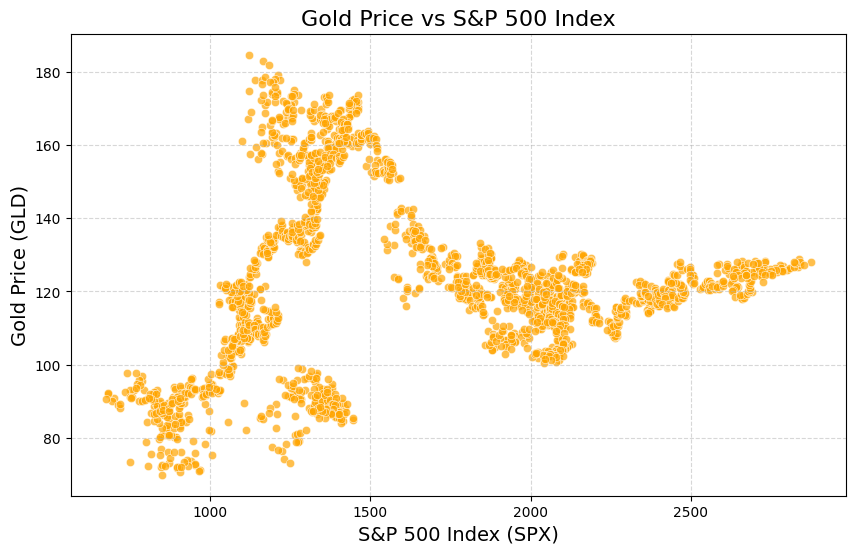

In [258]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gold_data['SPX'], y=gold_data['GLD'], color='orange', alpha=0.7)
plt.title('Gold Price vs S&P 500 Index', fontsize=16)
plt.xlabel('S&P 500 Index (SPX)', fontsize=14)
plt.ylabel('Gold Price (GLD)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.savefig("./plots/index.png")
plt.show()

#### Features and Target

In [259]:
features = ['SPX', 'USO', 'SLV', 'EUR/USD']
X = gold_data[features]
Y = gold_data['GLD']

In [260]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [261]:
X.columns

Index(['SPX', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [262]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

#### Train Test Split

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [264]:
X_train.head(2)

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886


In [265]:
Y_train.head()

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
Name: GLD, dtype: float64

In [266]:
X_test.head(2)

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581


In [267]:
Y_test.head()

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
Name: GLD, dtype: float64

#### Data Preprocessing

In [268]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#### Models

In [269]:
model_results = []

In [270]:
from sklearn.pipeline import make_pipeline

**Linear Regression**

In [271]:
lin_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
) 

In [272]:
lin_pipeline.fit(X_train, Y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [273]:
lin_y_pred = lin_pipeline.predict(X_test)

In [274]:
lin_mea = mean_absolute_error(y_true=Y_test, y_pred=lin_y_pred)
lin_mse = mean_squared_error(y_true=Y_test, y_pred=lin_y_pred)
lin_rmse = root_mean_squared_error(y_true=Y_test, y_pred=lin_y_pred)
lin_r2score = r2_score(y_true=Y_test, y_pred=lin_y_pred)


print(f"Mean Absolute Error for Linear Regression is {lin_mea}")
print(f"Mean Squared Error for Linear Regression is {lin_mse}")
print(f"Root Mean Squared Error for Linear Regression is {lin_rmse}")
print(f"R2 Score for Linear Regression is {lin_r2score}")

Mean Absolute Error for Linear Regression is 5.911486735777763
Mean Squared Error for Linear Regression is 70.78890079721529
Root Mean Squared Error for Linear Regression is 8.41361401522647
R2 Score for Linear Regression is 0.8657886565869237


In [275]:
lin_results = {
    'Model Name': 'Linear Regression',
    'Model File Name': 'lin_pipeline',
    'MAE': lin_mea,
    'MSE': lin_mse,
    'RMSE': lin_rmse,
    'R2 Score': lin_r2score
}

model_results.append(lin_results)

In [276]:
lin_results

{'Model Name': 'Linear Regression',
 'Model File Name': 'lin_pipeline',
 'MAE': 5.911486735777763,
 'MSE': 70.78890079721529,
 'RMSE': 8.41361401522647,
 'R2 Score': 0.8657886565869237}

**DecisionTree Regressor**

In [277]:
dtr_pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [278]:
dtr_pipeline.fit(X_train, Y_train)

,steps,"[('standardscaler', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [279]:
dtr_y_pred = dtr_pipeline.predict(X_test)

In [280]:
dtr_mea = mean_absolute_error(y_true=Y_test, y_pred=dtr_y_pred)
dtr_mse = mean_squared_error(y_true=Y_test, y_pred=dtr_y_pred)
dtr_rmse = root_mean_squared_error(y_true=Y_test, y_pred=dtr_y_pred)
dtr_r2score = r2_score(y_true=Y_test, y_pred=dtr_y_pred)


print(f"Mean Absolute Error for Decision Tree Regressor is {dtr_mea}")
print(f"Mean Squared Error for Decision Tree Regressor is {dtr_mse}")
print(f"Root Mean Squared Error for Decision Tree Regressor is {dtr_rmse}")
print(f"R2 Score for Decision Tree Regressor is {dtr_r2score}")

Mean Absolute Error for Decision Tree Regressor is 1.4252048362445415
Mean Squared Error for Decision Tree Regressor is 9.257694945138494
Root Mean Squared Error for Decision Tree Regressor is 3.042646043354122
R2 Score for Decision Tree Regressor is 0.982447987445733


In [281]:
dtr_results = {
    'Model Name': 'Decision Tree Regression',
    'Model File Name': 'dtr_pipeline',
    'MAE': dtr_mea,
    'MSE': dtr_mse,
    'RMSE': dtr_rmse,
    'R2 Score': dtr_r2score
}

model_results.append(dtr_results)

In [282]:
model_results

[{'Model Name': 'Linear Regression',
  'Model File Name': 'lin_pipeline',
  'MAE': 5.911486735777763,
  'MSE': 70.78890079721529,
  'RMSE': 8.41361401522647,
  'R2 Score': 0.8657886565869237},
 {'Model Name': 'Decision Tree Regression',
  'Model File Name': 'dtr_pipeline',
  'MAE': 1.4252048362445415,
  'MSE': 9.257694945138494,
  'RMSE': 3.042646043354122,
  'R2 Score': 0.982447987445733}]

**RandomForest Regression**

In [283]:
rfr_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [284]:
rfr_pipeline.fit(X_train, Y_train)

,steps,"[('standardscaler', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [285]:
rfr_y_pred = rfr_pipeline.predict(X_test)

In [286]:
rfr_mea = mean_absolute_error(y_true=Y_test, y_pred=rfr_y_pred)
rfr_mse = mean_squared_error(y_true=Y_test, y_pred=rfr_y_pred)
rfr_rmse = root_mean_squared_error(y_true=Y_test, y_pred=rfr_y_pred)
rfr_r2score = r2_score(y_true=Y_test, y_pred=rfr_y_pred)


print(f"Mean Absolute Error for Random Forest Regressor is {rfr_mea}")
print(f"Mean Squared Error for Random Forest Regressor is {rfr_mse}")
print(f"Root Mean Squared Error for Random Forest Regressor is {rfr_rmse}")
print(f"R2 Score for Random Forest Regressor is {rfr_r2score}")

Mean Absolute Error for Random Forest Regressor is 1.3434633544104808
Mean Squared Error for Random Forest Regressor is 5.524744065778533
Root Mean Squared Error for Random Forest Regressor is 2.3504774123097913
R2 Score for Random Forest Regressor is 0.9895254296262398


In [287]:
rfr_results = {
    'Model Name': 'Random Forest Regression',
    'Model File Name': 'rfr_pipeline',
    'MAE': rfr_mea,
    'MSE': rfr_mse,
    'RMSE': rfr_rmse,
    'R2 Score': rfr_r2score
}

model_results.append(rfr_results)

In [288]:
model_results

[{'Model Name': 'Linear Regression',
  'Model File Name': 'lin_pipeline',
  'MAE': 5.911486735777763,
  'MSE': 70.78890079721529,
  'RMSE': 8.41361401522647,
  'R2 Score': 0.8657886565869237},
 {'Model Name': 'Decision Tree Regression',
  'Model File Name': 'dtr_pipeline',
  'MAE': 1.4252048362445415,
  'MSE': 9.257694945138494,
  'RMSE': 3.042646043354122,
  'R2 Score': 0.982447987445733},
 {'Model Name': 'Random Forest Regression',
  'Model File Name': 'rfr_pipeline',
  'MAE': 1.3434633544104808,
  'MSE': 5.524744065778533,
  'RMSE': 2.3504774123097913,
  'R2 Score': 0.9895254296262398}]

**XGBoost Regression**

In [289]:
xgb_pipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor()
)

In [290]:
xgb_pipeline.fit(X_train, Y_train)

,steps,"[('standardscaler', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None


In [291]:
xgb_y_pred = xgb_pipeline.predict(X_test)

In [292]:
xgb_mea = mean_absolute_error(y_true=Y_test, y_pred=xgb_y_pred)
xgb_mse = mean_squared_error(y_true=Y_test, y_pred=xgb_y_pred)
xgb_rmse = root_mean_squared_error(y_true=Y_test, y_pred=xgb_y_pred)
xgb_r2score = r2_score(y_true=Y_test, y_pred=xgb_y_pred)


print(f"Mean Absolute Error for XGBoost Regressor is {xgb_mea}")
print(f"Mean Squared Error for XGBoost Regressor is {xgb_mse}")
print(f"Root Mean Squared Error for XGBoost Regressor is {xgb_rmse}")
print(f"R2 Score for XGBoost Regressor is {xgb_r2score}")

Mean Absolute Error for XGBoost Regressor is 1.4647312363547778
Mean Squared Error for XGBoost Regressor is 6.653740318488478
Root Mean Squared Error for XGBoost Regressor is 2.579484506347824
R2 Score for XGBoost Regressor is 0.9873849231050468


In [293]:
xgb_results = {
    'Model Name': 'XGBoost Regression',
    'Model File Name': 'xgb_pipeline',
    'MAE': xgb_mea,
    'MSE': xgb_mse,
    'RMSE': xgb_rmse,
    'R2 Score': xgb_r2score
}

model_results.append(xgb_results)

In [294]:
model_results

[{'Model Name': 'Linear Regression',
  'Model File Name': 'lin_pipeline',
  'MAE': 5.911486735777763,
  'MSE': 70.78890079721529,
  'RMSE': 8.41361401522647,
  'R2 Score': 0.8657886565869237},
 {'Model Name': 'Decision Tree Regression',
  'Model File Name': 'dtr_pipeline',
  'MAE': 1.4252048362445415,
  'MSE': 9.257694945138494,
  'RMSE': 3.042646043354122,
  'R2 Score': 0.982447987445733},
 {'Model Name': 'Random Forest Regression',
  'Model File Name': 'rfr_pipeline',
  'MAE': 1.3434633544104808,
  'MSE': 5.524744065778533,
  'RMSE': 2.3504774123097913,
  'R2 Score': 0.9895254296262398},
 {'Model Name': 'XGBoost Regression',
  'Model File Name': 'xgb_pipeline',
  'MAE': 1.4647312363547778,
  'MSE': 6.653740318488478,
  'RMSE': 2.579484506347824,
  'R2 Score': 0.9873849231050468}]

**ANN**

In [303]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [304]:
def build_ann():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [305]:
ann_pipeline = make_pipeline(
    StandardScaler(),
    KerasRegressor(model=build_ann, epochs=100, batch_size=16, verbose=1)
)

In [306]:
ann_pipeline.fit(X_train, Y_train)

e:\Free Lancing\UEL\Gold Price\genv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 14693.3525 - mae: 118.3599
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2700.0002 - mae: 40.7361
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 804.6335 - mae: 22.4143
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 378.0509 - mae: 15.6775
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 213.6134 - mae: 12.1214
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129.4906 - mae: 9.1881
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.2356 - mae: 8.1313
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.2877 - mae: 6.3669
Epoch 9/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.6181 - mae: 5.6993
Epoch 10/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.4523 - mae: 4.5026
Epoch 11/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.3788 - mae: 4.0497
Epoch 12/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.4227

,steps,"[('standardscaler', ...), ('kerasregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,model,<function bui...00261504B8900>
,build_fn,None
,warm_start,False
,random_state,None


In [307]:
ann_y_pred = ann_pipeline.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [308]:
ann_mea = mean_absolute_error(y_true=Y_test, y_pred=ann_y_pred)
ann_mse = mean_squared_error(y_true=Y_test, y_pred=ann_y_pred)
ann_rmse = root_mean_squared_error(y_true=Y_test, y_pred=ann_y_pred)
ann_r2score = r2_score(y_true=Y_test, y_pred=ann_y_pred)


print(f"Mean Absolute Error for ANN is {ann_mea}")
print(f"Mean Squared Error for ANN is {ann_mse}")
print(f"Root Mean Squared Error for ANN is {ann_rmse}")
print(f"R2 Score for ANN is {ann_r2score}")

Mean Absolute Error for ANN is 2.976981572389294
Mean Squared Error for ANN is 19.015823094996616
Root Mean Squared Error for ANN is 4.360713599285857
R2 Score for ANN is 0.9639471847289187


In [309]:
ann_results = {
    'Model Name': 'ANN Model',
    'Model File Name': 'ann_pipeline',
    'MAE': ann_mea,
    'MSE': ann_mse,
    'RMSE': ann_rmse,
    'R2 Score': ann_r2score
}

model_results.append(ann_results)

#### Final Results

In [310]:
gold_results = pd.DataFrame(model_results)
gold_results

,Model Name,Model File Name,MAE,MSE,RMSE,R2 Score
0,Linear Regression,lin_pipeline,5.911487,70.788901,8.413614,0.865789
1,Decision Tree Regression,dtr_pipeline,1.425205,9.257695,3.042646,0.982448
2,Random Forest Regression,rfr_pipeline,1.343463,5.524744,2.350477,0.989525
3,XGBoost Regression,xgb_pipeline,1.464731,6.653740,2.579485,0.987385
4,ANN Model,ann_pipeline,2.976982,19.015823,4.360714,0.963947


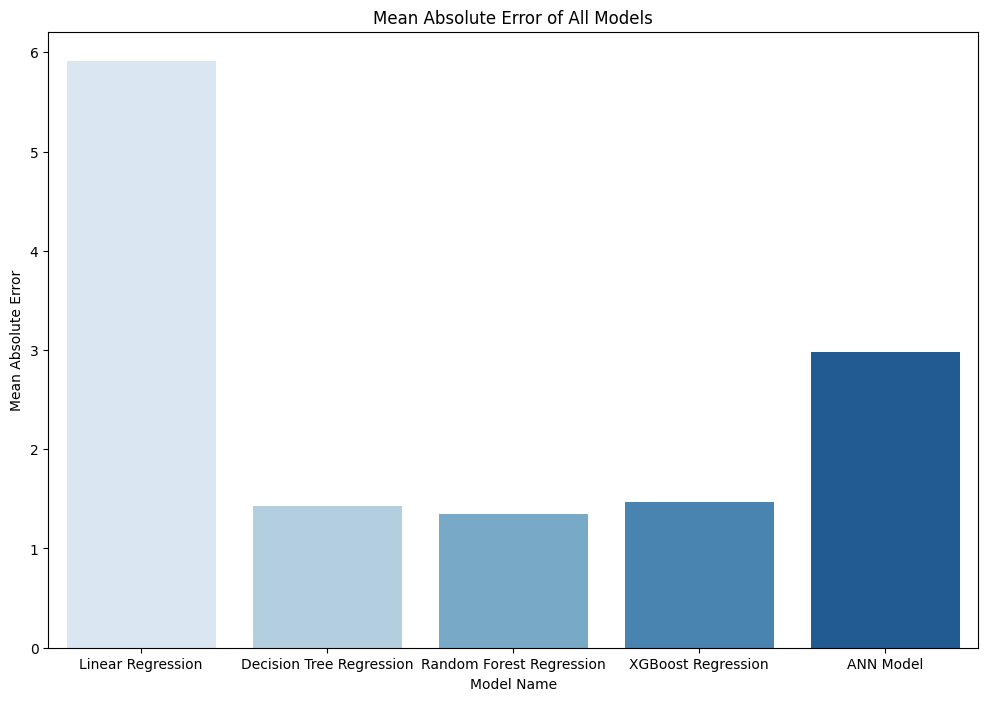

In [311]:
plt.figure(figsize=(12, 8))
sns.barplot(data=gold_results, x='Model Name', y='MAE', hue='Model Name', palette="Blues")
plt.xlabel("Model Name")
plt.ylabel('Mean Absolute Error')
plt.title("Mean Absolute Error of All Models")
plt.savefig("./plots/mae.png")
plt.show()

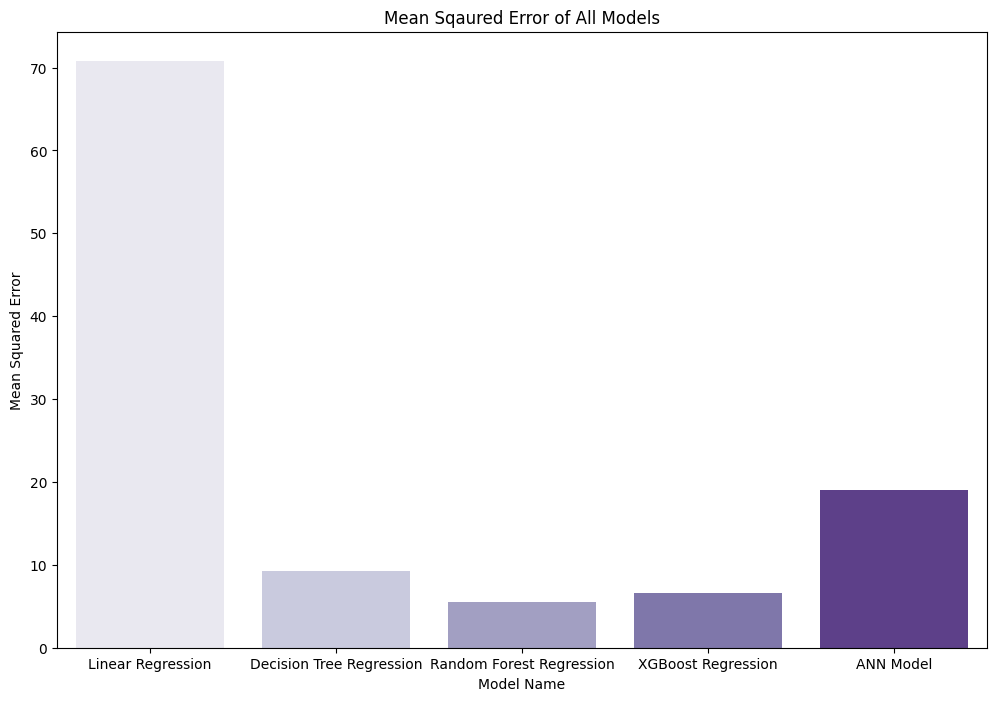

In [312]:
plt.figure(figsize=(12, 8))
sns.barplot(data=gold_results, x='Model Name', y='MSE', hue='Model Name', palette="Purples")
plt.xlabel("Model Name")
plt.ylabel('Mean Squared Error')
plt.title("Mean Sqaured Error of All Models")
plt.savefig("./plots/mse.png")
plt.show()

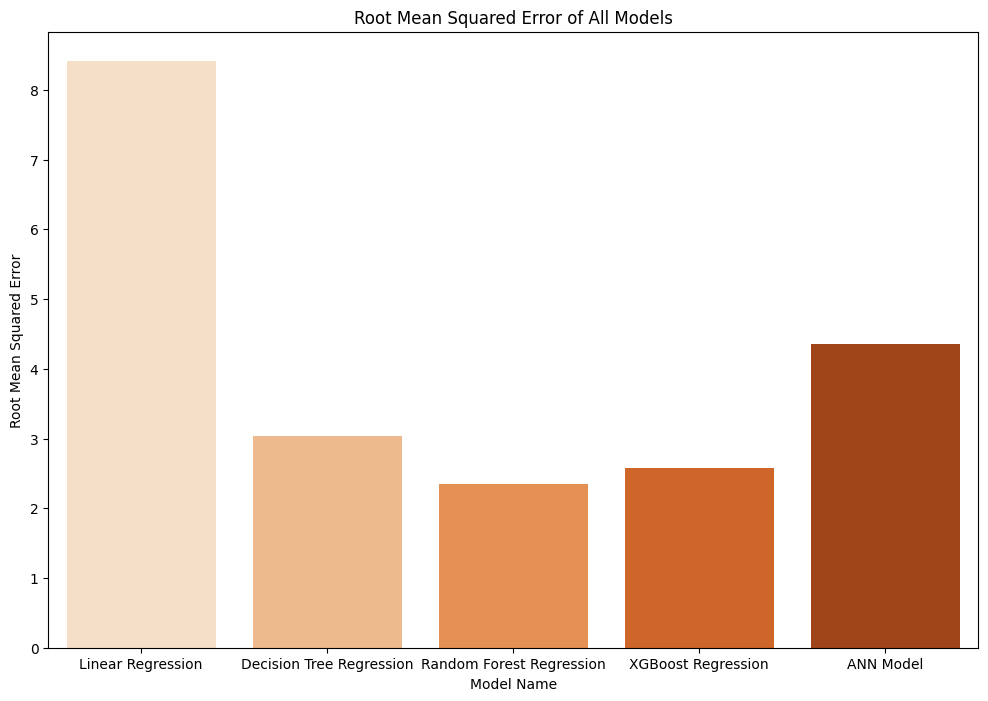

In [313]:
plt.figure(figsize=(12, 8))
sns.barplot(data=gold_results, x='Model Name', y='RMSE', hue='Model Name', palette="Oranges")
plt.xlabel("Model Name")
plt.ylabel('Root Mean Squared Error')
plt.title("Root Mean Squared Error of All Models")
plt.savefig("./plots/rmse.png")
plt.show()

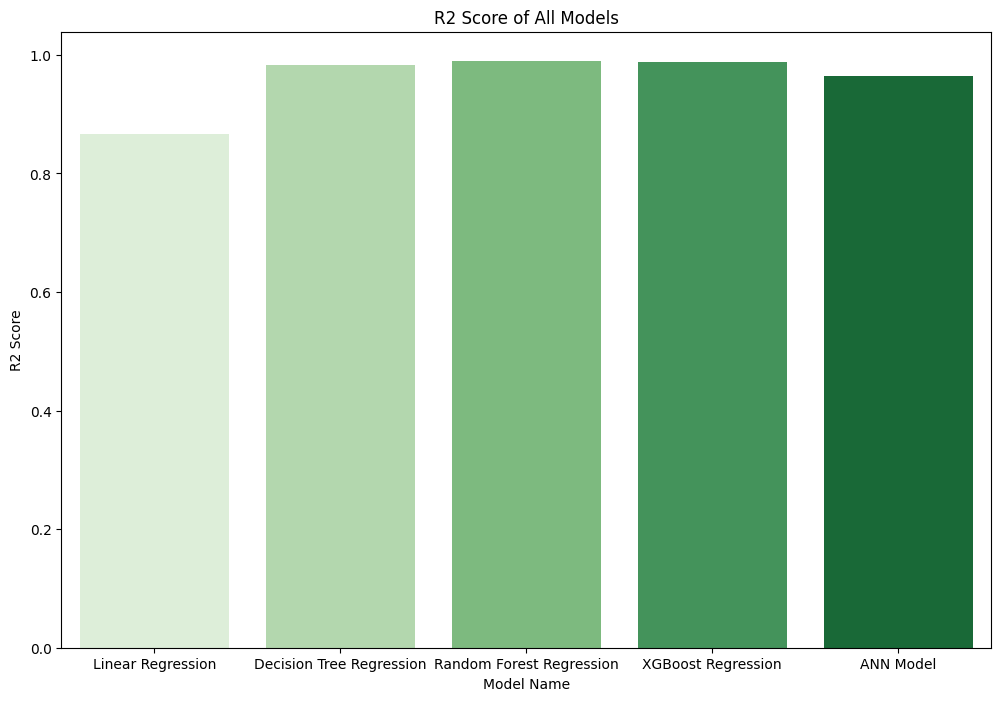

In [314]:
plt.figure(figsize=(12, 8))
sns.barplot(data=gold_results, x='Model Name', y='R2 Score', hue='Model Name', palette="Greens")
plt.xlabel("Model Name")
plt.ylabel('R2 Score')
plt.title("R2 Score of All Models")
plt.savefig("./plots/r2score.png")
plt.show()

#### Model Saving

In [315]:
# Find the row with the highest accuracy
best_row = gold_results.loc[gold_results['MAE'].idxmin()]

# Get the model file from that row
best_model_file = best_row['Model File Name']

print("Best model file:", best_model_file)

Best model file: rfr_pipeline


In [316]:
import joblib

joblib.dump(rfr_pipeline, 'rfr_model.pkl')

['rfr_model.pkl']